> I read a story on Wired that calculates optimal driving speed to save gas and money.
It's a great story but i have some objections.

* You can't price your free time.
* What about if you dont have a job?


https://www.wired.com/story/is-there-an-optimal-driving-speed-that-saves-gas-and-money/amp


To better tell you the whole story i need to better understand it.
İ will start with importing the libraries I need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Fuel consumpytions of cars are changing by the speed. Reasearch paper by a group of scientist formulize this change as follows.
https://saemobilus.sae.org/content/2013-01-1113/


In [2]:
def calculate_mpg(actual_mpg,velocity):
  mpg = (-0.00062 * actual_mpg**2 + 0.01345*actual_mpg - 0.34192) * velocity + 0.0533*actual_mpg**2 - 0.3580* actual_mpg + 30.0424 
  return mpg

#Some black box

In [3]:
velocity_series = np.linspace(50,80,30)

In [4]:
mpg_series30 = calculate_mpg(30,velocity_series)
mpg_series40 = calculate_mpg(40,velocity_series)
mpg_series50 = calculate_mpg(50,velocity_series)

In [5]:
mpg_series30

array([42.4514    , 41.93786207, 41.42432414, 40.91078621, 40.39724828,
       39.88371034, 39.37017241, 38.85663448, 38.34309655, 37.82955862,
       37.31602069, 36.80248276, 36.28894483, 35.7754069 , 35.26186897,
       34.74833103, 34.2347931 , 33.72125517, 33.20771724, 32.69417931,
       32.18064138, 31.66710345, 31.15356552, 30.64002759, 30.12648966,
       29.61295172, 29.09941379, 28.58587586, 28.07233793, 27.5588    ])

In [6]:
df = pd.DataFrame(velocity_series)

In [7]:
df.rename({0: 'Velocity'}, axis=1,inplace = True)

In [8]:
df ['EPA30'] = mpg_series30
df ['EPA40'] = mpg_series40
df ['EPA50'] = mpg_series50

In [9]:
df.head(5)

,Velocity,EPA30,EPA40,EPA50
0,50.000000,42.451400,61.206400,84.421400
1,51.034483,41.937862,60.383034,83.159931
2,52.068966,41.424324,59.559669,81.898462
3,53.103448,40.910786,58.736303,80.636993
4,54.137931,40.397248,57.912938,79.375524


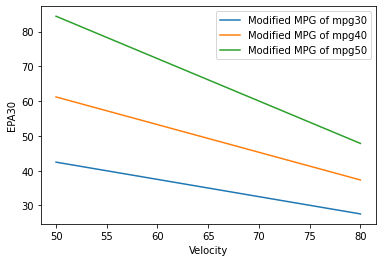

In [10]:
sns.lineplot(data=df,x='Velocity',y='EPA30',label='Modified MPG of mpg30')
sns.lineplot(data=df,x='Velocity',y='EPA40',label='Modified MPG of mpg40')
sns.lineplot(data=df,x='Velocity',y='EPA50',label='Modified MPG of mpg50')

Here you can see that cars consume more fuel don't care much.

(better mpg cars gets better by driving slowly)

#Here comes the the black magic
Cost of traveling,
If we propose that you  work if you are not travelling, if you have other means of opportunity cost(such as speending your travel time with your family, you can put the cost if this time to your hourly salary) (if you can calculate the real cost of this time)

In [11]:
def calculate_cost_of_travel_time(hourly_rate,distance,mph):
  travel_time = distance/mph
  return hourly_rate * travel_time

# total distance / mpg * gas price
#cost of gas = total distance / mpg * gas price 
def calc_gas_cost(total_distance,mpg,gas_price=4,):
  return total_distance / mpg * gas_price

You can edit these field to better suit your needs.

In [16]:
Distance_to_work = 35
Gas_Price = 4
Hourly_rate = 17
Cars_mpg = 52

In [17]:
speed_series = np.linspace(55,90,50)
mpg_series = calculate_mpg(Cars_mpg,speed_series)
cost_series = calculate_cost_of_travel_time(Hourly_rate,Distance_to_work,speed_series) + calc_gas_cost(Distance_to_work,mpg_series)
cost_series_for_unemployed = calc_gas_cost(Distance_to_work,mpg_series)
cost_of_time_series = calculate_cost_of_travel_time(Hourly_rate,Distance_to_work,mpg_series)

Optimum Speed for Unemployed ==> 55.0
Optimum Speed for Employed.  ==> 82.85714285714286


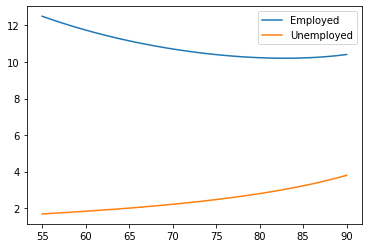

In [18]:
#print(f"Minumum Cost of Gas for Trip ==> {float(calc_gas_cost(Distance_to_work,mpg_series).min())}")
print(f"Optimum Speed for Unemployed ==> {float(speed_series[np.where(cost_series_for_unemployed == cost_series_for_unemployed.min())])}")
print(f"Optimum Speed for Employed.  ==> {float(speed_series[np.where(cost_series == cost_series.min())])}")
sns.lineplot(x=speed_series,y=cost_series,label='Employed')
sns.lineplot(x=speed_series,y=cost_series_for_unemployed,label='Unemployed')
#sns.lineplot(x=speed_series,y=cost_of_time_series)


Conclusion:
You can live the life if you are unemployed.
No need to run!!!